In [1]:
import pandas as pd


In [14]:
data=pd.read_csv("LUBS5990M_courseworkData_2324.csv")
data

,ID,success,brandSlogan,hasVideo,rating,priceUSD,countryRegion,startDate,endDate,teamSize,hasGithub,hasReddit,platform,coinNum,minInvestment,distributedPercentage
0,1,N,Is One of Its Kind ERC-20 Decentralized Stable...,1,4.0,30.00,Singapore,01/10/2019,01/10/2019,31.0,1,1,Ethereum,509999,0,0.49
1,2,N,The Ultimate Blockchain Gaming Platform,1,4.3,0.13,Malta,07/09/2018,12/10/2018,20.0,1,1,XAYA,225000000,1,0.41
2,3,N,Simple Automated Investment App Driven by AI & ML,1,4.4,0.01,UK,01/07/2019,30/06/2020,10.0,1,1,Stellar,5000000000,1,0.40
3,4,Y,International Real Estate Crowdfunding Platform,1,4.3,NaN,Netherlands,01/10/2019,15/12/2019,27.0,1,1,Separate blockchain,125000000,1,0.13
4,5,N,"Secure, Interference-Free Communications System",1,4.3,0.03,Mauritius,28/07/2019,30/11/2019,14.0,1,1,Ethereum,5000000000,1,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2762,2763,N,Helping the adoption of cryptocurrency,0,1.0,1.00,USA,02/12/2017,31/12/2017,NaN,0,0,Ethereum,800000000,0,0.80
2763,2764,N,The Adult Industry Crypto,0,1.0,0.30,Indonesia,15/09/2017,31/10/2017,NaN,0,0,Ethereum,100000000,0,0.20
2764,2765,Y,"Fast, cheap, scalable token transfers",1,2.0,0.67,Germany,18/10/2017,01/11/2017,NaN,1,1,Ethereum,50000000,0,0.50
2765,2766,N,CarVDB Blockchain Platform,0,1.8,0.33,Bulgaria,01/04/2018,11/06/2018,NaN,0,0,Ethereum,49978560,1,0.50


C:\Users\aishp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aishp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aishp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aishp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.ty

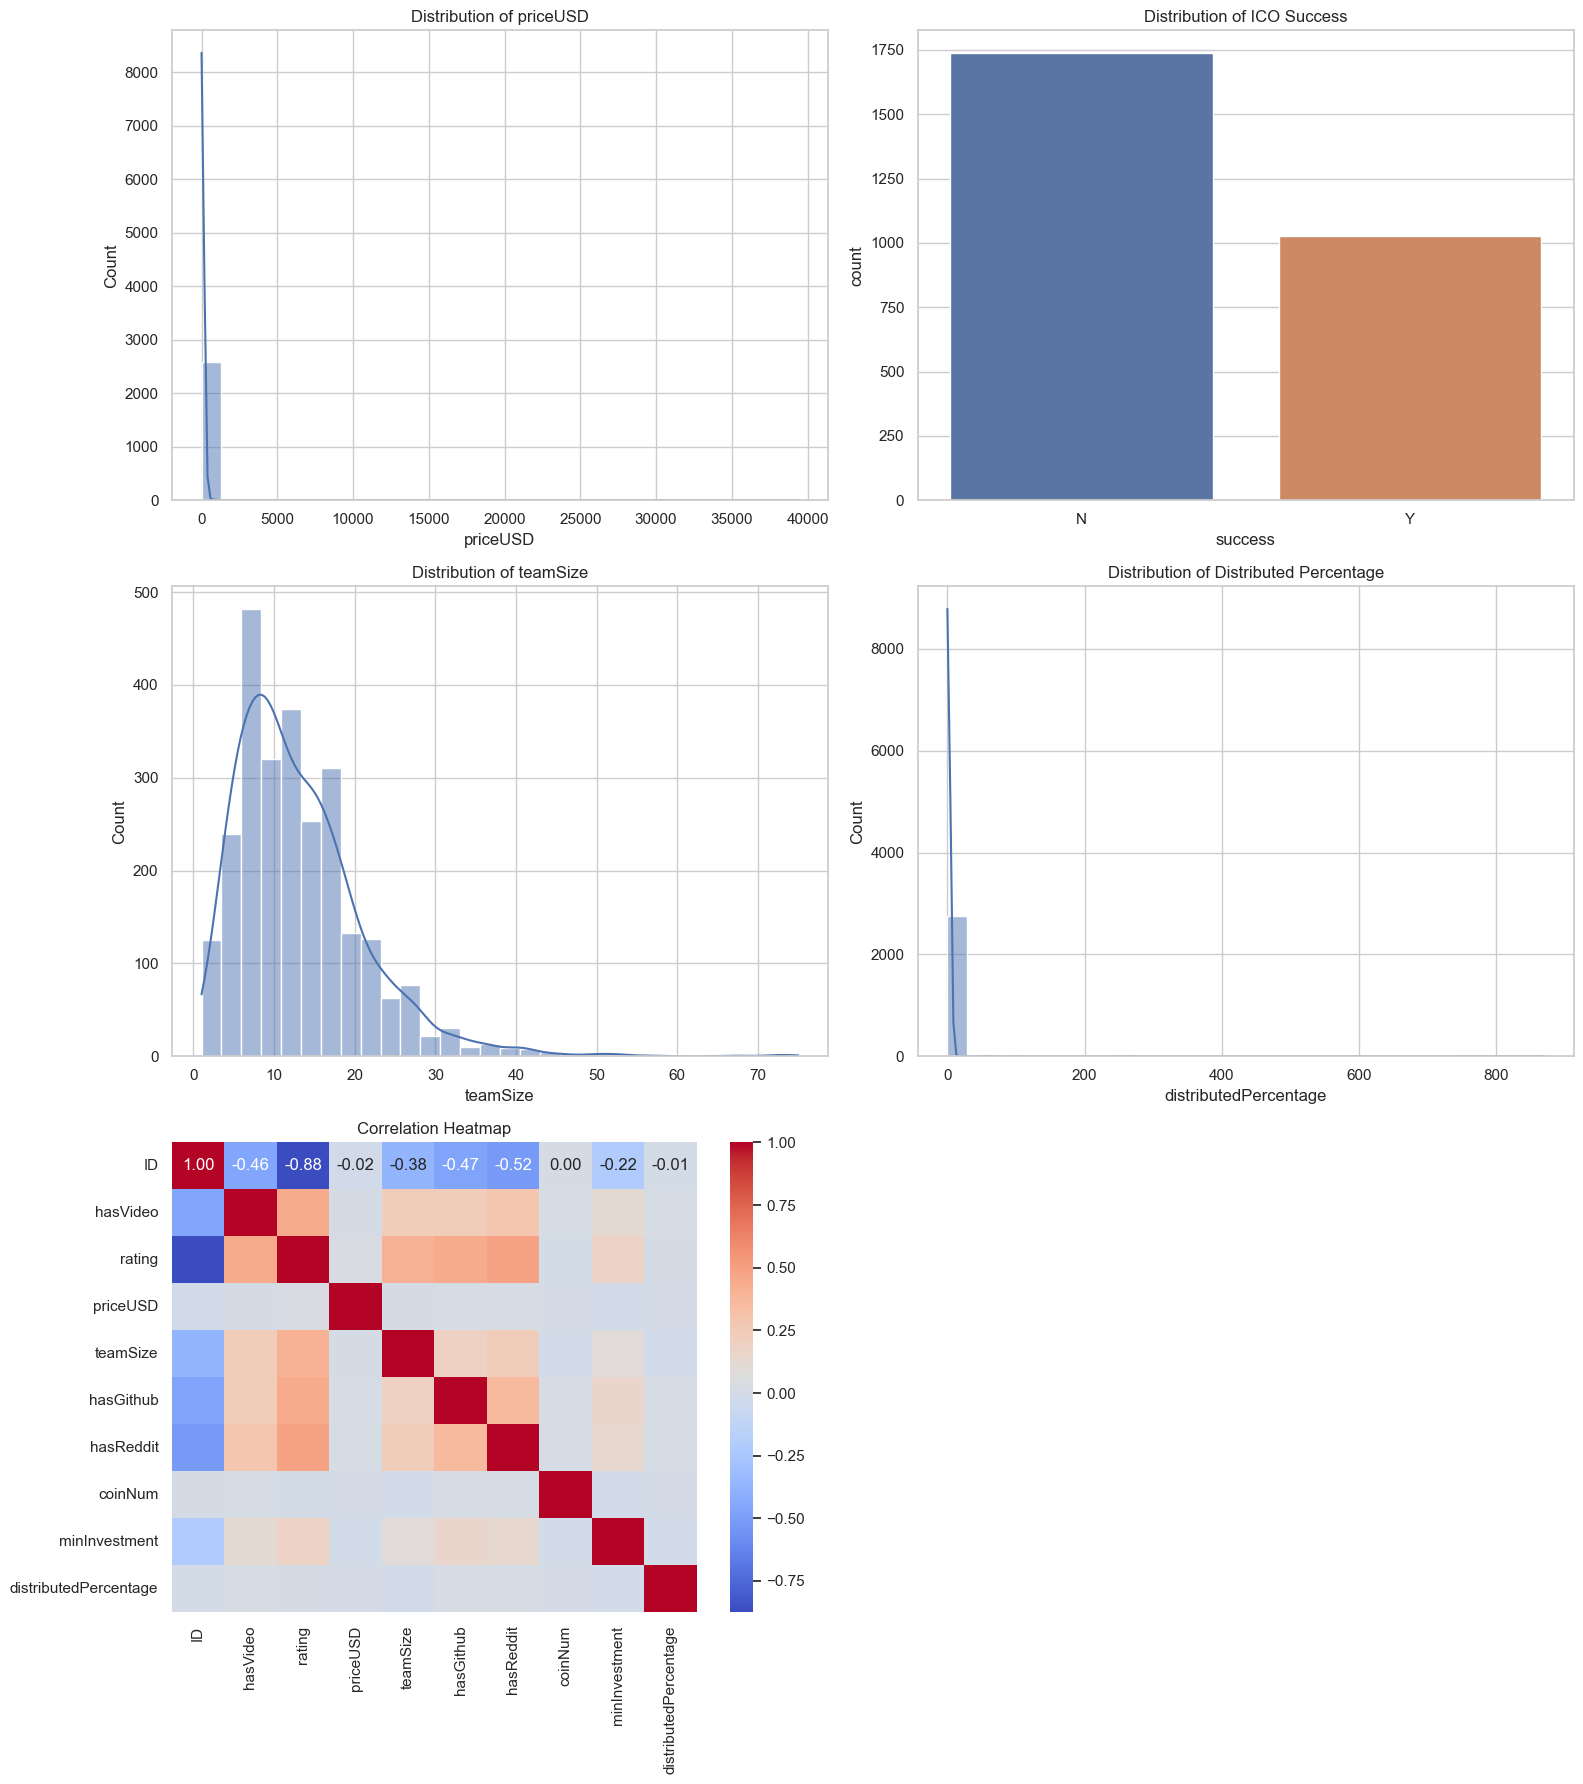

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setting up the visualization environment
sns.set(style="whitegrid")

# Creating visualizations: Histograms for numerical data and bar charts for categorical data
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# Histogram of priceUSD
sns.histplot(data=data, x='priceUSD', bins=30, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribution of priceUSD')

# Bar chart of success
sns.countplot(data=data, x='success', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of ICO Success')

# Histogram of teamSize
sns.histplot(data=data, x='teamSize', bins=30, ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Distribution of teamSize')

# Histogram of distributedPercentage
sns.histplot(data=data, x='distributedPercentage', bins=30, ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Distribution of Distributed Percentage')

# Correlation heatmap
corr = data.select_dtypes(include=[np.number]).corr() # This will select only numeric columns for correlation
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[2, 0])
axes[2, 0].set_title('Correlation Heatmap')

# Cleaning up layout for unused axes
axes[2, 1].set_visible(False)

plt.tight_layout()
plt.show()


In [16]:
# Handling missing values based on the selected strategies
data['priceUSD'].fillna(data['priceUSD'].median(), inplace=True)
# data['countryRegion'].fillna(data['countryRegion'].mode()[0], inplace=True)
data['countryRegion'].fillna('Unknown', inplace=True)
data['teamSize'].fillna(data['teamSize'].median(), inplace=True)

# Confirming the changes by checking missing values again
data.isnull().sum()


ID                       0
success                  0
brandSlogan              0
hasVideo                 0
rating                   0
priceUSD                 0
countryRegion            0
startDate                0
endDate                  0
teamSize                 0
hasGithub                0
hasReddit                0
platform                 0
coinNum                  0
minInvestment            0
distributedPercentage    0
dtype: int64

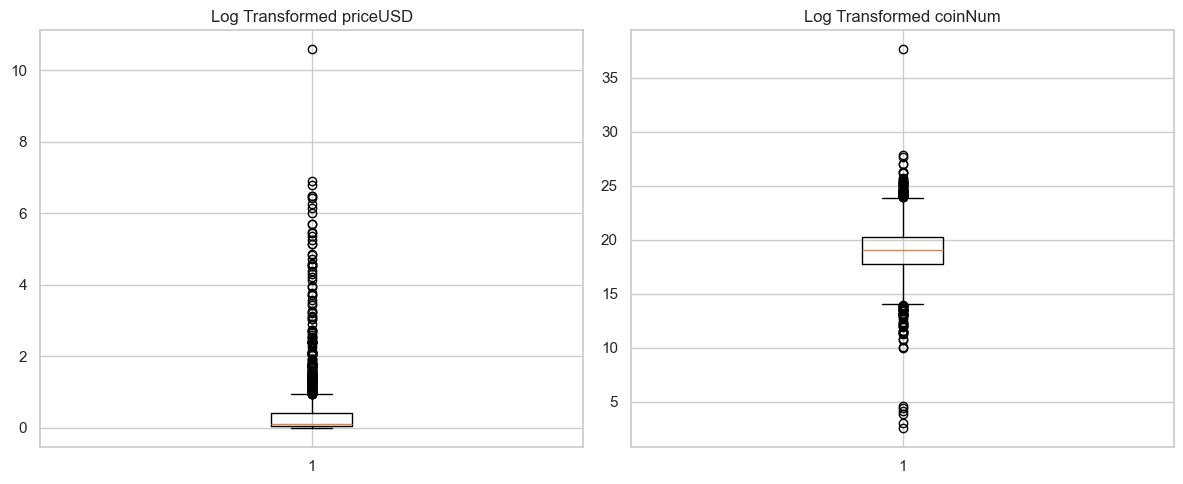

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Applying a logarithmic transformation to 'priceUSD' and 'coinNum' to normalize distributions
data['priceUSD_log'] = np.log1p(data['priceUSD'])  # log1p is used to handle zero values by log(x+1)
data['coinNum_log'] = np.log1p(data['coinNum'])

# Visualizing the transformed columns to check the effect on outlier distribution
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].boxplot(data['priceUSD_log'])
axs[0].set_title('Log Transformed priceUSD')

axs[1].boxplot(data['coinNum_log'])
axs[1].set_title('Log Transformed coinNum')

plt.tight_layout()
plt.show()


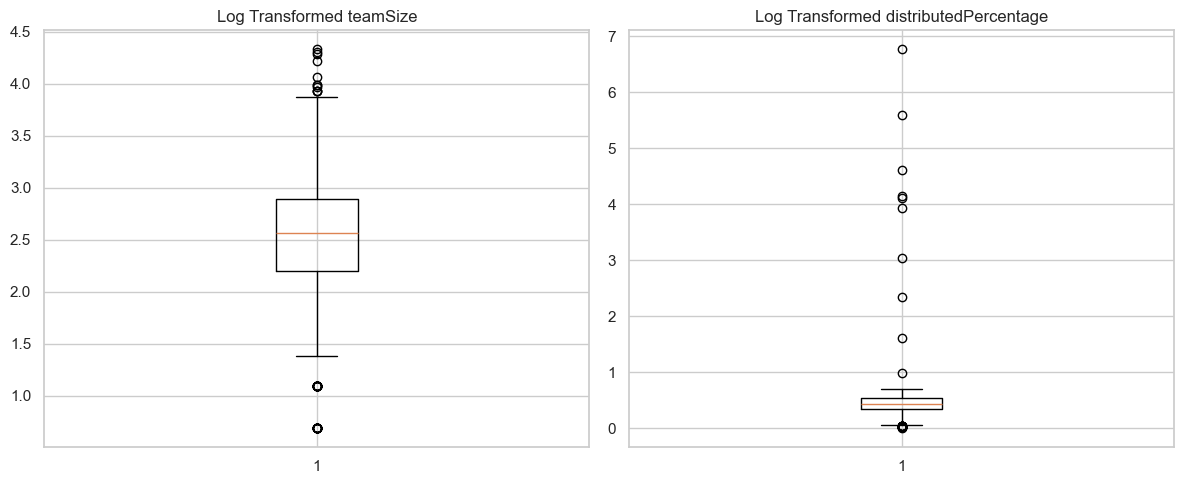

In [18]:
# Applying a logarithmic transformation to 'teamSize' to normalize the distribution
data['teamSize_log'] = np.log1p(data['teamSize'])

# Since 'distributedPercentage' is already bounded between 0 and 100, and to handle 0% values, a slight adjustment is needed before log transform
data['distributedPercentage_log'] = np.log1p(data['distributedPercentage'] + 0.01)  # Adding 0.01 to handle 0 values

# Visualizing the log-transformed columns to check the effect on outlier distribution
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].boxplot(data['teamSize_log'])
axs[0].set_title('Log Transformed teamSize')

axs[1].boxplot(data['distributedPercentage_log'])
axs[1].set_title('Log Transformed distributedPercentage')

plt.tight_layout()
plt.show()


In [19]:
# Correcting date parsing by specifying the correct format
data['startDate'] = pd.to_datetime(data['startDate'], format='%d/%m/%Y', errors='coerce')
data['endDate'] = pd.to_datetime(data['endDate'], format='%d/%m/%Y', errors='coerce')

# Recalculate the campaign duration to handle any previously incorrect parsings
data['campaignDuration'] = (data['endDate'] - data['startDate']).dt.days

# Standardizing country names by converting all to uppercase
data['countryRegion'] = data['countryRegion'].str.upper()

# Check again the parsed dates and standardized country names
data[['startDate', 'endDate', 'campaignDuration']].head(), data['countryRegion'].unique()


(   startDate    endDate  campaignDuration
 0 2019-10-01 2019-10-01                 0
 1 2018-09-07 2018-10-12                35
 2 2019-07-01 2020-06-30               365
 3 2019-10-01 2019-12-15                75
 4 2019-07-28 2019-11-30               125,
 array(['SINGAPORE', 'MALTA', 'UK', 'NETHERLANDS', 'MAURITIUS', 'POLAND',
        'GERMANY', 'SAMOA', 'THAILAND', 'ESTONIA', 'CAYMAN ISLANDS',
        'GIBRALTAR', 'FRANCE', 'SAINT KITTS AND NEVIS',
        'BRITISH VIRGIN ISLANDS', 'USA', 'BELIZE', 'PANAMA', 'SLOVENIA',
        'LIECHTENSTEIN', 'AUSTRALIA', 'VENEZUELA', 'SWITZERLAND',
        'SEYCHELLES', 'PORTUGAL', 'NIGERIA', 'BULGARIA', 'CYPRUS',
        'BRAZIL', 'INDIA', 'UKRAINE', 'UNITED ARAB EMIRATES',
        'SIERRA LEONE', 'CANADA', 'LITHUANIA', 'AUSTRIA', 'GEORGIA',
        'RUSSIA', 'ARGENTINA', 'MONTENEGRO', 'DENMARK', 'ROMANIA',
        'LATVIA', 'SERBIA', 'MALAYSIA', 'BERMUDA', 'SOUTH AFRICA',
        'KYRGYZSTAN', 'SAINT VINCENT AND THE GRENADINES', 'COSTA RICA',

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Encoding categorical variables
label_encoder_country = LabelEncoder()
label_encoder_platform = LabelEncoder()
data['countryRegion_encoded'] = label_encoder_country.fit_transform(data['countryRegion'])
data['platform_encoded'] = label_encoder_platform.fit_transform(data['platform'])
# data['region_encoded'] = LabelEncoder().fit_transform(data['region'].fillna('Unknown'))  # Handling any potential missing regions

# Display the first few rows of the updated DataFrame to verify the changes
data.isnull().sum()


ID                           0
success                      0
brandSlogan                  0
hasVideo                     0
rating                       0
priceUSD                     0
countryRegion                0
startDate                    0
endDate                      0
teamSize                     0
hasGithub                    0
hasReddit                    0
platform                     0
coinNum                      0
minInvestment                0
distributedPercentage        0
priceUSD_log                 0
coinNum_log                  0
teamSize_log                 0
distributedPercentage_log    0
campaignDuration             0
countryRegion_encoded        0
platform_encoded             0
dtype: int64

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score



from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

# Selecting features for scaling
numerical_features = ['rating', 'teamSize_log', 'priceUSD_log', 'coinNum_log', 'distributedPercentage_log']

# Applying standardization
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Selecting features including newly scaled features
selected_features = [
    'hasVideo', *numerical_features,'minInvestment', 'countryRegion_encoded', 'platform_encoded','campaignDuration'
]
X = data[selected_features]
y = data['success'].apply(lambda x: 1 if x == 'Y' else 0)  # Convert 'success' to binary

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Optionally, evaluate feature importances
importances = model.feature_importances_
feature_importance_dict = dict(zip(selected_features, importances))
print("Feature importances:", feature_importance_dict)

Accuracy: 0.6064981949458483
Feature importances: {'hasVideo': 0.011021398874346063, 'rating': 0.1605013714597531, 'teamSize_log': 0.12771103109255777, 'priceUSD_log': 0.1305456343288157, 'coinNum_log': 0.13752588584529624, 'distributedPercentage_log': 0.12162212444387087, 'minInvestment': 0.029320236732690384, 'countryRegion_encoded': 0.09809568063569668, 'platform_encoded': 0.020080545764716774, 'campaignDuration': 0.1635760908222564}


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Predict on the testing set
y_pred_lr = logreg.predict(X_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Generate a classification report
report_lr = classification_report(y_test, y_pred_lr)

print("Accuracy of Logistic Regression:", accuracy_lr)
print("Classification Report for Logistic Regression:\n", report_lr)


Accuracy of Logistic Regression: 0.6660649819494585
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.71      0.82      0.76       357
           1       0.54      0.40      0.46       197

    accuracy                           0.67       554
   macro avg       0.63      0.61      0.61       554
weighted avg       0.65      0.67      0.65       554



In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
random_forest.fit(X_train, y_train)

# Predict on the testing set
y_pred_rf = random_forest.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Generate a classification report
report_rf = classification_report(y_test, y_pred_rf)

print("Accuracy of Random Forest:", accuracy_rf)
print("Classification Report for Random Forest:\n", report_rf)


Accuracy of Random Forest: 0.6552346570397112
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.70      0.81      0.75       357
           1       0.52      0.38      0.44       197

    accuracy                           0.66       554
   macro avg       0.61      0.59      0.59       554
weighted avg       0.64      0.66      0.64       554



In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Initialize the logistic regression model
logreg = LogisticRegression(random_state=42)

# Define a parameter grid
param_grid = {
    'solver': ['liblinear', 'saga'],  # Solvers suitable for smaller datasets and binary classification
    'penalty': ['l1', 'l2'],         # Norms used for regularization
    'C': [0.01, 0.1, 1, 10, 100]     # Inverse of regularization strength
}
# Configure GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)
# Best parameters and best score from GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Evaluating the best model on the test set
best_logreg = grid_search.best_estimator_
test_accuracy = best_logreg.score(X_test, y_test)

print("Best Parameters:", best_params)
print("Best Cross-validation Score:", best_score)
print("Test Accuracy:", test_accuracy)
from sklearn.metrics import classification_report

# Predict on the testing set
y_pred_best = best_logreg.predict(X_test)

# Generate a classification report
report_best = classification_report(y_test, y_pred_best)

print("Classification Report for Best Logistic Regression Model:\n", report_best)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-validation Score: 0.6769097984739998
Test Accuracy: 0.6660649819494585
Classification Report for Best Logistic Regression Model:
               precision    recall  f1-score   support

           0       0.71      0.82      0.76       357
           1       0.54      0.40      0.46       197

    accuracy                           0.67       554
   macro avg       0.63      0.61      0.61       554
weighted avg       0.65      0.67      0.65       554



In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
decision_tree.fit(X_train, y_train)

# Predict on the testing set
y_pred_dt = decision_tree.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Generate a classification report
report_dt = classification_report(y_test, y_pred_dt)

print("Accuracy of Decision Tree:", accuracy_dt)
print("Classification Report for Decision Tree:\n", report_dt)
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Setup Grid Search
grid_search_dt = GridSearchCV(decision_tree, param_grid_dt, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV
grid_search_dt.fit(X_train, y_train)

# Best parameters and best score from GridSearchCV
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

# Evaluating the best model on the test set
best_dt = grid_search_dt.best_estimator_
test_accuracy_dt = best_dt.score(X_test, y_test)

print("Best Parameters for Decision Tree:", best_params_dt)
print("Best CV Score for Decision Tree:", best_score_dt)
print("Test Accuracy for Decision Tree:", test_accuracy_dt)
# Predict on the testing set with the optimized model
y_pred_opt_dt = best_dt.predict(X_test)

# Generate a classification report for the optimized model
report_opt_dt = classification_report(y_test, y_pred_opt_dt)

print("Optimized Decision Tree Classification Report:\n", report_opt_dt)


Accuracy of Decision Tree: 0.6064981949458483
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.70      0.69      0.69       357
           1       0.45      0.46      0.45       197

    accuracy                           0.61       554
   macro avg       0.57      0.57      0.57       554
weighted avg       0.61      0.61      0.61       554

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 20}
Best CV Score for Decision Tree: 0.6176920012665599
Test Accuracy for Decision Tree: 0.6371841155234657
Optimized Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72       357
           1       0.49      0.49      0.49       197

    accuracy                           0.64       554
   macro avg       0.60      0.60      0.60       55

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Fit the model on the training data
gradient_boosting.fit(X_train, y_train)

# Predict on the testing set
y_pred_gb = gradient_boosting.predict(X_test)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Generate a classification report
report_gb = classification_report(y_test, y_pred_gb)

print("Accuracy of Gradient Boosting:", accuracy_gb)
print("Classification Report for Gradient Boosting:\n", report_gb)
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Setup Grid Search
grid_search_gb = GridSearchCV(gradient_boosting, param_grid_gb, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV
grid_search_gb.fit(X_train, y_train)

# Best parameters and best score from GridSearchCV
best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_

# Evaluating the best model on the test set
best_gb = grid_search_gb.best_estimator_
test_accuracy_gb = best_gb.score(X_test, y_test)

print("Best Parameters for Gradient Boosting:", best_params_gb)
print("Best CV Score for Gradient Boosting:", best_score_gb)
print("Test Accuracy for Gradient Boosting:", test_accuracy_gb)
# Predict on the testing set with the optimized model
y_pred_opt_gb = best_gb.predict(X_test)

# Generate a classification report for the optimized model
report_opt_gb = classification_report(y_test, y_pred_opt_gb)

print("Optimized Gradient Boosting Classification Report:\n", report_opt_gb)


Accuracy of Gradient Boosting: 0.6696750902527075
Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

           0       0.71      0.82      0.76       357
           1       0.55      0.39      0.46       197

    accuracy                           0.67       554
   macro avg       0.63      0.61      0.61       554
weighted avg       0.65      0.67      0.65       554

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best CV Score for Gradient Boosting: 0.6678773888440599
Test Accuracy for Gradient Boosting: 0.6714801444043321
Optimized Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.83      0.77       357
           1       0.56      0.38      0.45       197

    accuracy                           0.67       554
   macro avg       0.63      0.61

In [27]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Support Vector Machine classifier
svm_model = SVC(kernel='linear', random_state=42)  # Using a linear kernel for simplicity

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Generate a classification report
report_svm = classification_report(y_test, y_pred_svm)

print("Accuracy of SVM:", accuracy_svm)
print("Classification Report for SVM:\n", report_svm)


Accuracy of SVM: 0.6624548736462094
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.71      0.80      0.75       357
           1       0.53      0.42      0.47       197

    accuracy                           0.66       554
   macro avg       0.62      0.61      0.61       554
weighted avg       0.65      0.66      0.65       554



In [28]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid for SVM
# param_grid_svm = {
#     'C': [0.1, 1, 10],  # Regularization parameter
#     'kernel': ['linear', 'rbf', 'poly'],  # Type of kernel
#     'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
# }

# # Setup Grid Search
# grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='accuracy', verbose=1)

# # Fit GridSearchCV
# grid_search_svm.fit(X_train, y_train)

# # Best parameters and best score from GridSearchCV
# best_params_svm = grid_search_svm.best_params_
# best_score_svm = grid_search_svm.best_score_

# # Evaluating the best model on the test set
# best_svm = grid_search_svm.best_estimator_
# test_accuracy_svm = best_svm.score(X_test, y_test)

# print("Best Parameters for SVM:", best_params_svm)
# print("Best CV Score for SVM:", best_score_svm)
# print("Test Accuracy for SVM:", test_accuracy_svm)
